In [3]:
%matplotlib inline


Plotting with Geoplot and GeoPandas
-----------------------------------

Geoplot <https://residentmario.github.io/geoplot/index.html> _는 사용하기 쉬운 
지형 공간 시각화를 제공하는 Python 라이브러리입니다. 그것은이 튜토리얼의 별도 섹션에서 다루는 하위 레벨 CartoPy <http://scitools.org.uk/cartopy/> _ 위에 구축되었으며 GeoPandas 입력을 사용하도록 설계되었습니다.

이 예제는 geoplot API에 대한 간단한 둘러보기입니다. 라이브러리에 대한 자세한 내용은 해당 문서 <https://residentmario.github.io/geoplot/index.html> _을 참조하십시오.

먼저 GeoPandas를 사용하여 데이터를로드합니다.


In [4]:
import geopandas

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

boroughs = geopandas.read_file(geopandas.datasets.get_path('nybb')).to_crs(epsg='4326')
injurious_collisions = geopandas.read_file(
    "https://github.com/ResidentMario/geoplot-data/raw/master/nyc-injurious-collisions.geojson")

Plotting with Geoplot
=====================

Geoplot을 사용하여 기본 GeoPandas 세계 플롯을 복제하는 것으로 시작합니다.



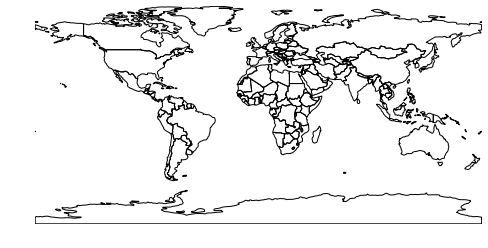

In [5]:
import geoplot

geoplot.polyplot(df, figsize=(8, 4))

Geoplot은 다음과 같은지도 투영법에 데이터를 다시 투영 할 수 있습니다.
CartoPy (목록보기
`here <http://scitools.org.uk/cartopy/docs/latest/crs/projections.html>`_).


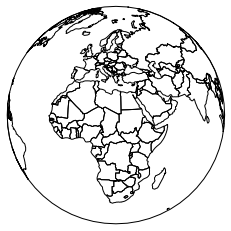

In [6]:
import geoplot.crs as gcrs
ax = geoplot.polyplot(df, projection=gcrs.Orthographic(), figsize=(8, 4))
ax.set_global()
ax.outline_patch.set_visible(True)

``polyplot``은 사소한 것이며 여러분이 전달한 도형을 그릴 수 있습니다. 만약
색상을 시각적 변수로 사용하려면``choropleth``를 지정하십시오. 이리
국가 별 GDP를 색상별로 5 개 버킷으로 분류합니다.


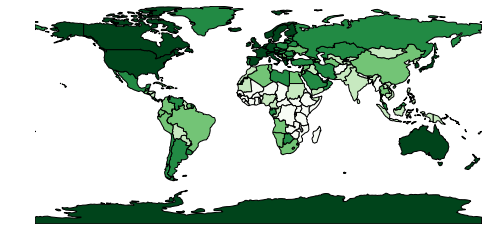

In [7]:
geoplot.choropleth(df, hue='gdp_pp', cmap='Greens', figsize=(8, 4))

크기를 시각적 변수로 사용하려면``cartogram``이 필요합니다. 
아프리카 국가들의 인구 추계입니다.


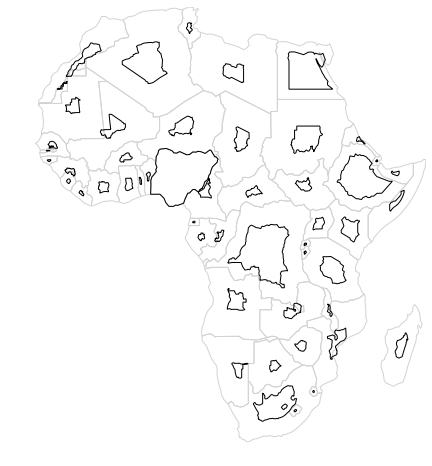

In [8]:
geoplot.cartogram(df[df['continent'] == 'Africa'],
                  scale='pop_est', limits=(0.2, 1), figsize=(7, 8))

공간상의 점 형태의 데이터가 있다면, 우리는
``kdeplot``을 이용한 3 차원 히트 맵. 이 예제 또한
서로의 위에 플롯을 쌓는 것이 얼마나 쉬운지를 보여줍니다.


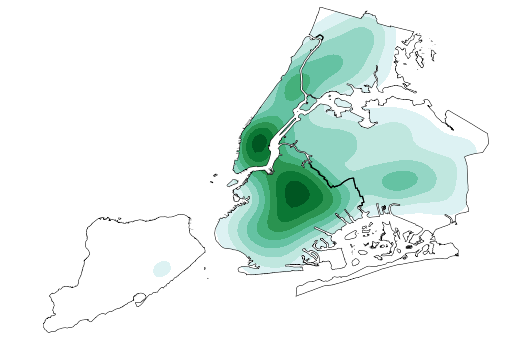

In [9]:
ax = geoplot.kdeplot(injurious_collisions.sample(1000),
                     shade=True, shade_lowest=False,
                     clip=boroughs.geometry)
geoplot.polyplot(boroughs, ax=ax)

또한, 우리는 자동 지역으로 공간을 분할 할 수있다,
Voronoi 테셀레이션을 사용합니다.

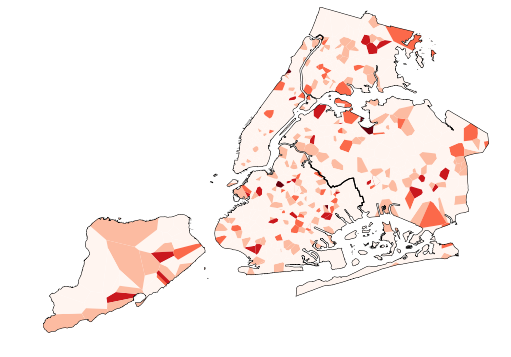

In [11]:
ax = geoplot.voronoi(
    injurious_collisions.sample(1000),
    hue='NUMBER OF PERSONS INJURED', cmap='Reds', scheme='fisher_jenks',
    clip=boroughs.geometry,
    linewidth=0)
geoplot.polyplot(boroughs, ax=ax)

다시 말하지만, 이것들은 Geoplot으로 만들 수있는 몇 가지 플롯입니다. 간단한 소개에서 다루지 않은 몇 가지 다른 가능은 아래 사이트에서 참고하세요,
`Gallery <https://residentmario.github.io/geoplot/gallery.html>`_ in the
Geoplot documentation.

